# Ethereum Classic Price

by: Widya Meiriska

### 1. Read Dataset

In [6]:
import csv
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('../data/raw/bitcoin/ethereum_classic_price.csv', parse_dates = ['Date'])

In [8]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
404,2016-07-28,1.560000,1.920000,1.370000,1.730000,"40,291,300","128,530,000"
405,2016-07-27,2.460000,2.460000,1.260000,1.600000,"62,645,700","202,315,000"
406,2016-07-26,0.604737,2.850000,0.600358,2.550000,"103,066,000","49,768,300"
407,2016-07-25,0.931993,0.932862,0.452446,0.602402,"9,308,400","76,700,600"
408,2016-07-24,0.752345,0.959354,0.737342,0.928814,"17,769,300",-


### 2. Data Investigation

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [10]:
df.count()

Date          409
Open          409
High          409
Low           409
Close         409
Volume        409
Market Cap    409
dtype: int64

In [11]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

#### There is a missing data here and there are several data which have different format. Some of the data do not use number format

In [12]:
# Change object to format number, and replace '-' to 'NaN'
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',',''))) 
df['Market Cap'] = df['Market Cap'].replace('-', 'NaN')
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',',''))) 

In [13]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
404,2016-07-28,1.560000,1.920000,1.370000,1.730000,40291300.0,128530000.0
405,2016-07-27,2.460000,2.460000,1.260000,1.600000,62645700.0,202315000.0
406,2016-07-26,0.604737,2.850000,0.600358,2.550000,103066000.0,49768300.0
407,2016-07-25,0.931993,0.932862,0.452446,0.602402,9308400.0,76700600.0
408,2016-07-24,0.752345,0.959354,0.737342,0.928814,17769300.0,NaN


In [14]:
df.count()

Date          409
Open          409
High          409
Low           409
Close         409
Volume        409
Market Cap    408
dtype: int64

In [20]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
Date,0,0.000000
Open,0,0.000000
High,0,0.000000
Low,0,0.000000
Close,0,0.000000
Volume,0,0.000000
Market Cap,1,0.002445


I try to fill in the missing value by interpolated the data

In [16]:
# Lets see the correlation between each column
correlation = df.corr(method="pearson")
correlation['Market Cap']

Open          0.999885
High          0.994373
Low           0.997050
Close         0.993213
Volume        0.685504
Market Cap    1.000000
Name: Market Cap, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

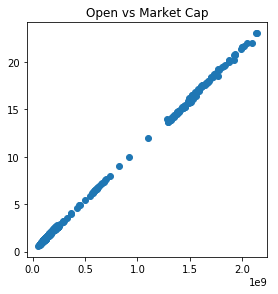

In [18]:
#Plot data to see the relation between each column
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
O = df['Open']
MC = df['Market Cap']
plt.subplot(5,5,5)
plt.scatter(MC, O)
plt.title('Open vs Market Cap')

plt.show

To fill the NaN value I try to interpolate the data using linear method using value from Open column. Because from the information above we can see that Market Cap has the closest correlation with Open.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 7 columns):
Date          409 non-null datetime64[ns]
Open          409 non-null float64
High          409 non-null float64
Low           409 non-null float64
Close         409 non-null float64
Volume        409 non-null float64
Market Cap    408 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.4 KB


In [22]:
from sklearn import linear_model

model = linear_model.LinearRegression()
Open  = df[['Open']].iloc[0:407]
Market_Cap = df['Market Cap'].iloc[0:407]

In [23]:
#Train model 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
#The model score almost 1 so that indicate the model is near to the truth
model.score(Open, Market_Cap)

0.99976948194746

Here I make a new column Market Cap Predict which contains Market Cap with no NaN value

In [25]:
#Add a new column which is filled the missing data from model fit
open = df[['Open']]
Market_Cap_Predict = model.predict(open)
df['Market Cap Predict'] = Market_Cap_Predict
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
404,2016-07-28,1.560000,1.920000,1.370000,1.730000,40291300.0,128530000.0,1.365646e+08
405,2016-07-27,2.460000,2.460000,1.260000,1.600000,62645700.0,202315000.0,2.211221e+08
406,2016-07-26,0.604737,2.850000,0.600358,2.550000,103066000.0,49768300.0,4.681504e+07
407,2016-07-25,0.931993,0.932862,0.452446,0.602402,9308400.0,76700600.0,7.756163e+07
408,2016-07-24,0.752345,0.959354,0.737342,0.928814,17769300.0,NaN,6.068322e+07


In [26]:
df.count()

Date                  409
Open                  409
High                  409
Low                   409
Close                 409
Volume                409
Market Cap            408
Market Cap Predict    409
dtype: int64

In [27]:
# Get the statistical information
df.describe()

,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
count,409.000000,409.000000,409.000000,409.000000,4.090000e+02,4.080000e+02,4.090000e+02
mean,5.775844,6.094761,5.475332,5.812246,4.833992e+07,5.338094e+08,5.326547e+08
std,6.794953,7.170771,6.398472,6.806962,1.008472e+08,6.388339e+08,6.384044e+08
min,0.604737,0.766068,0.452446,0.602402,2.673670e+05,4.976830e+07,4.681504e+07
25%,1.210000,1.240000,1.170000,1.210000,1.366170e+06,1.045622e+08,1.036811e+08
50%,1.610000,1.740000,1.440000,1.610000,5.549740e+06,1.358010e+08,1.412622e+08
75%,13.690000,14.110000,12.250000,13.810000,5.243400e+07,1.294485e+09,1.276211e+09
max,23.030000,24.620000,21.970000,23.270000,8.214400e+08,2.135600e+09,2.153730e+09


#### Now the data is clean, no null value and has same format

### 3. Data Visualization

In [28]:
# Set Date as it's index
df.set_index('Date', inplace = True )

Text(0.5,1,'Date vs Market Cap Predict')

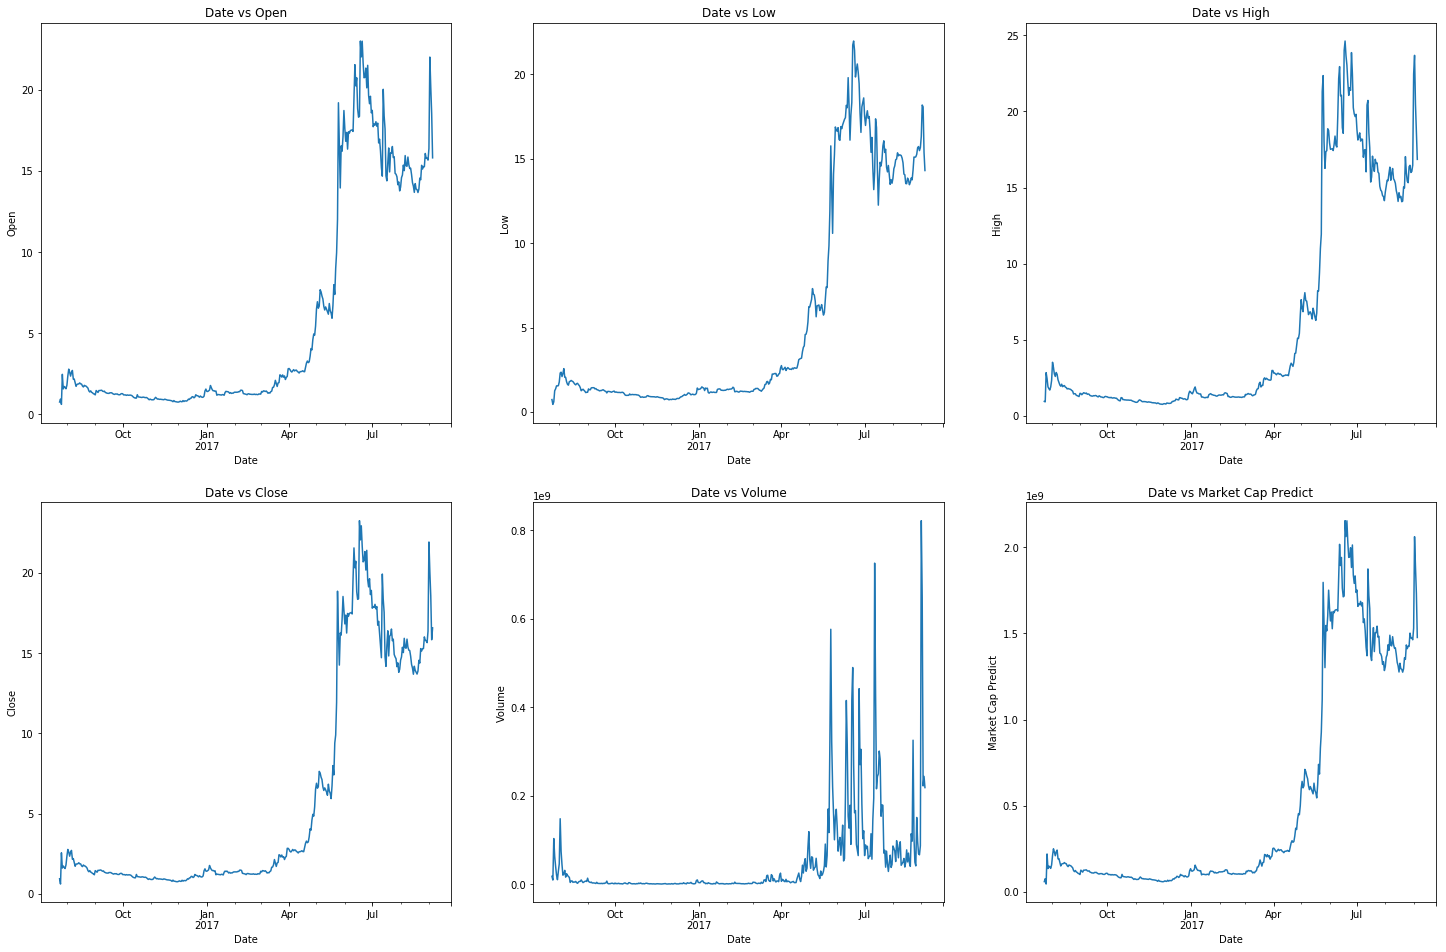

In [29]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
plt.figure(figsize=(25, 25))

plt.subplot(3,3,1)
plt.ylabel('Open')
df.Open.plot()
plt.title('Date vs Open')

plt.subplot(3,3,2)
plt.ylabel('Low')
df.Low.plot()
plt.title('Date vs Low')

plt.subplot(3,3,3)
plt.ylabel('High')
df.High.plot()
plt.title('Date vs High')

plt.subplot(3,3,4)
plt.ylabel('Close')
df.Close.plot()
plt.title('Date vs Close')

plt.subplot(3,3,5)
plt.ylabel('Volume')
df.Volume.plot()
plt.title('Date vs Volume')

plt.subplot(3,3,6)
plt.ylabel('Market Cap Predict')
df['Market Cap Predict'].plot()
plt.title('Date vs Market Cap Predict')